Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
autism_data = pd.read_csv('/content/sample_data/train.csv')

In [ ]:
# printing the first 5 rows of the dataframe
autism_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,result,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,no,no,7.819715,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,no,no,10.544296,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,no,no,13.167506,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,no,no,1.530098,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,no,yes,7.949723,0


In [ ]:
# number of rows and columns in the dataframe
autism_data.shape

(800, 17)

In [ ]:
# getting more information about the dataset
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         800 non-null    int64  
 1   A1_Score   800 non-null    int64  
 2   A2_Score   800 non-null    int64  
 3   A3_Score   800 non-null    int64  
 4   A4_Score   800 non-null    int64  
 5   A5_Score   800 non-null    int64  
 6   A6_Score   800 non-null    int64  
 7   A7_Score   800 non-null    int64  
 8   A8_Score   800 non-null    int64  
 9   A9_Score   800 non-null    int64  
 10  A10_Score  800 non-null    int64  
 11  age        800 non-null    float64
 12  gender     800 non-null    object 
 13  jaundice   800 non-null    object 
 14  autism     800 non-null    object 
 15  result     800 non-null    float64
 16  Class/ASD  800 non-null    int64  
dtypes: float64(2), int64(12), object(3)
memory usage: 106.4+ KB


In [ ]:
# checking for missing values in each column
autism_data.isnull().sum()

ID           0
A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
jaundice     0
autism       0
result       0
Class/ASD    0
dtype: int64

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
autism_data['gender']=le.fit_transform(autism_data['gender'])
autism_data['jaundice']=le.fit_transform(autism_data['jaundice'])
autism_data['autism']=le.fit_transform(autism_data['autism'])
autism_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,result,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,7.819715,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,10.544296,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,13.167506,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,1.530098,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,7.949723,0


In [ ]:
#gender

print(autism_data['gender'].unique())

[0 1]


In [ ]:
# getting some statistical measures about the data
autism_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,0.481250,0.245000,0.146250,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,0.499961,0.430356,0.353578,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,0.000000,0.000000,0.000000,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,0.000000,0.000000,0.000000,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,0.000000,0.000000,0.000000,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,1.000000,0.000000,0.000000,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,1.000000,1.000000,1.000000,13.390868,1.000000


In [ ]:
# distribution of target Variable
autism_data['Class/ASD'].value_counts()

0    615
1    185
Name: Class/ASD, dtype: int64

In [ ]:
# grouping the data bas3ed on the target variable
autism_data.groupby('Class/ASD').mean()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,result
Class/ASD,,,,,,,,,,,,,,,,
0,392.687805,0.504065,0.19187,0.180488,0.276423,0.334959,0.087805,0.177236,0.663415,0.178862,0.339837,27.579535,0.515447,0.200000,0.073171,6.028087
1,426.470270,0.843243,0.60000,0.789189,0.875676,0.864865,0.610811,0.594595,0.897297,0.772973,0.859459,32.045570,0.367568,0.394595,0.389189,10.484056


Data Pre-Processing

Separating the features & Target

In [ ]:
X = autism_data.drop(columns=['ID','Class/ASD'], axis=1)
Y = autism_data['Class/ASD']

In [ ]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         1         1         1         0   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         0   
3           0         0         0         1         0         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         1         1         1         1         1         1         1   
796         1         1         0         0         1         0         0   
797         0         0         0         0         0         0         1   
798         1         1         1         1         1         1         0   
799         1         0         0         1         1         0         0   

     A8_Score  A9_Score  A10_Score        age  gender  jaundice  autism  \


In [ ]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
795    1
796    0
797    1
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(800, 15) (640, 15) (160, 15)


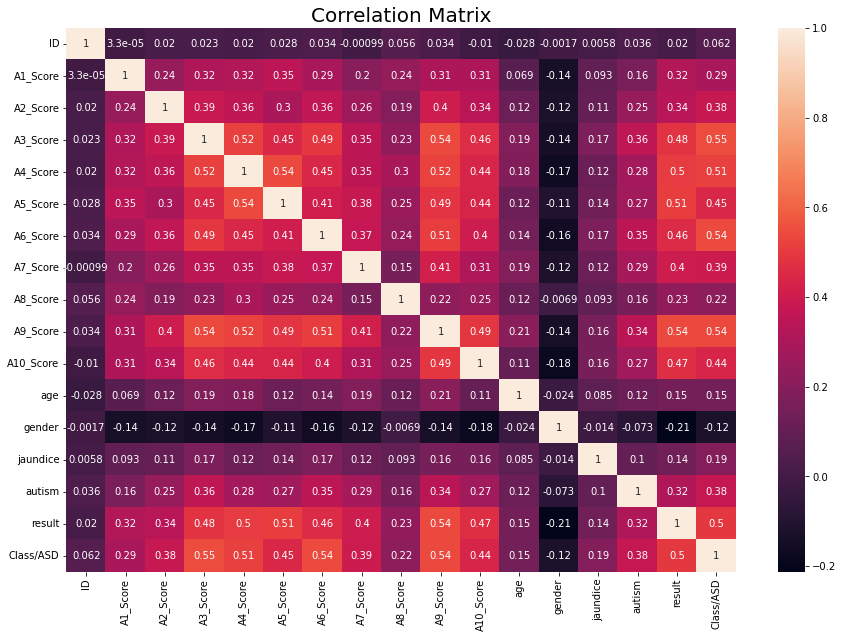

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 10))
sns.heatmap(autism_data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);


Model Training

Support Vector Machine Model

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.890625


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8375


Building a Predictive System

In [ ]:
input_data = (0,0,0,0,0,0,0,0,0,1,13.82937,1,0,0,10.5443)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Autism Disease")

else:
  print("The Person has Autism")

[0]
The Person does not have Autism Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Saving the trained model



In [ ]:
import pickle

In [ ]:
filename = 'Autism_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('Autism_model.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
gender
jaundice
autism
result
